In [12]:
%matplotlib inline

# 592B, Class 4.2 (02/12).  Aliasing and the Sampling theorem

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
import scipy.signal as signal
import librosa #new!

from ipywidgets import interactive
from IPython.display import Audio, display

After I did some experimenting, I've found that the `librosa` library seems to work as expected with resampling. Like `scipy.io.wavfile`, it also reads in audio files as numpy arrays. So I think we can safely switch to using `librosa` for I/O and resampling, as well as some other functions, and continue to use `scipy.signal`. You can get `librosa` by following the instructions at the [librosa github site](https://github.com/librosa/librosa). Follow the instructions for Anaconda. You should also take a look at the [demo jupyter notebook](http://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb). Note for example, that by default, when audio files are read in they are remixed to mono and resampled to 22050 Hz.

## Resampling with librosa

Here's an example reading in an audio file with `librosa.load` and resampling with librosa `librosa.core.resample`. The original WAV file in this case is already sampled at 22050 Hz. We re-sample to 8000 Hz and 2000 Hz. 

***In-class exercise: Play around with different rates for resampling. At what sampling rate do you start hearing a difference between the resampled audio and the original? What kind of difference do you hear as the sampling rate drops?***

In [23]:
y, sr = librosa.load("hmong_m6_24_c.wav")
print(type(y)) # Note that it is a numpy array
print("The sampling rate is: ", sr, "Hz")


y_8k = librosa.resample(y, sr, 8000)
y_2k = librosa.resample(y, sr, 2000)
y_500 = librosa.resample(y, sr, 500)

display(Audio(data=y,rate = sr))
display(Audio(data=y_8k,rate = 8000))
display(Audio(data=y_2k,rate = 2000))
display(Audio(data=y_500,rate = 500))


<class 'numpy.ndarray'>
The sampling rate is:  22050 Hz


***In-class exercise: What if the WAV file had been sampled at 44.kHz and you didn't want it to be resampled when read into python? How would you do that? How does the resampling algorithm used by librosa compared to that used by scipy.signal?***

## Aliasing

Consider the following function:

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$

***In class-exercise: What is the (fundamental) frequency of $f(t)$?***

Text(0.5,1,'1000 Hz sampling rate')

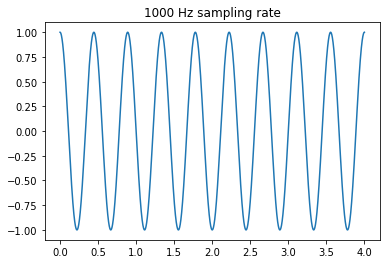

In [25]:
fs = 1000 # Sampling rate of 1000 Hz
t_start = 0; t_stop = 4
ns = int((t_stop - t_start) * fs + 1)
x = np.linspace(0,4,ns)
y = np.cos(9*np.pi/2*x)

plt.figure("1000 Hz sampling rate")
plt.plot(x,y)
plt.title("1000 Hz sampling rate")


Now let's try sampling this signal at some different sampling rates:

1. 100 Hz
2. 10 Hz
3. 1 Hz

In [26]:

ns_100 = int((t_stop - t_start) * 100 + 1)
x_100 = np.linspace(0,4,ns_100)
y_100 = np.cos(9*np.pi/2*x_100)

ns_10 = int((t_stop - t_start) * 10 + 1)
x_10 = np.linspace(0,4,ns_10)
y_10 = np.cos(9*np.pi/2*x_10)

ns_1 = int((t_stop - t_start) * 1 + 1)
x_1 = np.linspace(0,4,ns_1)
y_1 = np.cos(9*np.pi/2*x_1)



[None, None]

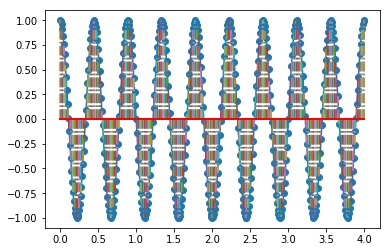

In [27]:
plt.figure("100 Hz sampling rate")
plt.plot(x,y)
markerline, stemlines, baseline = plt.stem(x_100,y_100, '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)


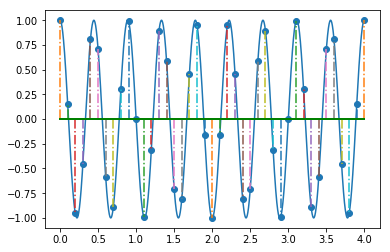

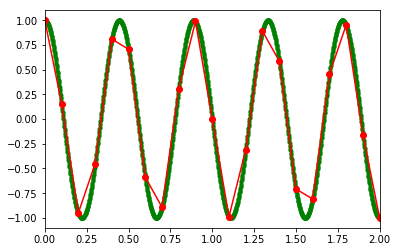

In [28]:

plt.figure("10 Hz sampling rate")
plt.plot(x,y)
markerline, stemlines, baseline = plt.stem(x_10,y_10, '-.')
plt.setp(baseline, 'color', 'g', 'linewidth', 2)

plt.figure("10 Hz sampling rate 2")
plt.xlim(0,2)
plt.plot(x,y, 'g.', x_10, y_10, 'ro-')

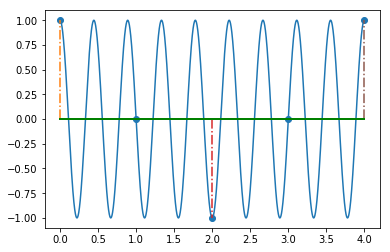

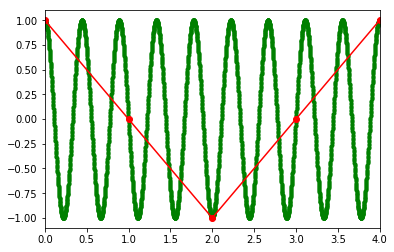

In [29]:
plt.figure("1 Hz sampling rate")
plt.plot(x,y)
markerline, stemlines, baseline = plt.stem(x_1,y_1, '-.')

plt.setp(baseline, 'color', 'g', 'linewidth', 2)
plt.figure("1 Hz sampling rate 2")
plt.xlim(0,4)
plt.plot(x,y, 'g.', x_1, y_1, 'ro-')

Wow, we sure are missing a lot of data--could we still recover the original signal $y(t)$?

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$


***In-class exercise: can you think of a function $z(t)$ that has the same values as our $y(t)$ at the sampled timepoints when we sample with a rate of 1Hz? If so, plot it together with the original signal and the 1 Hz sampling points.*** 

To do this, you could change
```
plt.plot(x,y)
```
to something like this, where `z` is your definition of $z(t)$ and `x2` is a vector of the sampled time points for 1 Hz sampling rate:

```
plt.plot(x,y, 'g.', x2, z, 'ro-')
```

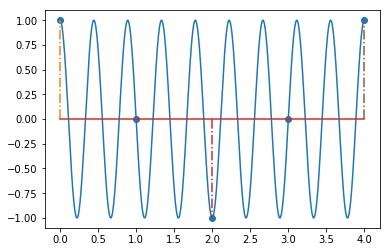

In [20]:
plt.figure("1 Hz sampling rate, aliasing")
plt.plot(x,y) # change this to add in plot of z(t)
markerline, stemlines, baseline = plt.stem(x_1,y_1, '-.')

***In-class exercise: suppose you sample at a sampling rate of 4.5 Hz. Overlay the stem plot with the original signal for this sampling rate (like the previous plots).***


## The sampling theorem

The minimal sampling rate that can be used to reconstruct a signal from its samples is two times the frequency of the highest frequency component $\nu_{max}$ in the signal:

   sampling rate $> 2\nu_{max}$

The frequency 2$\nu_{max}$ is often called the **Nyquist frequency**.

***In-class exercise: What is the Nyquist frequency for $y(t)$ below?***

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$


So for a complex wave (a sum of sinusoids), increasing the frequency of the highest frequency component $\nu_{max}$ drives up the required sampling rate for reconstruction. Sometimes there is no highest frequency, e.g., in an infinite series like for a square wave.

Here's a intuitive example to play with. Plot a signal composed of a low frequency sinusoid and a high frequency sinusoid. As the gap in frequencies between the two frequency components increases, the resulting complex wave looks closer and closer to the lower frequency component, with lots of squigglies up and down at the frequency of the higher frequency component.


In [21]:
def plot_play_summed_sines(f1 = 440, f2 = 880, t_start = 0, t_stop = 2, fs = 44100, xlim_max = 0.01):
    x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
    y1 = np.sin(2*np.pi*f1*x)
    y2 = np.sin(2*np.pi*f2*x)
    
    plt.xlim(t_start,xlim_max)
    plt.plot(x , y1, "-g", label="y1") 
    plt.plot(x , y2, "-b", label="y2") 
    plt.plot(x , y1 + y2, "-r", label="y1+y2") 
    plt.legend(loc="upper right") 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    plt.title("Adding up sines") 
    
    display(Audio(data=y1, rate=fs))
    display(Audio(data=y2, rate=fs))
    display(Audio(data=y1+y2, rate=fs))
    
v = interactive(plot_play_summed_sines, f1=(50,200), f2=(1000,5000), t_start = (0,0), t_stop = (0,5), xlim_max = (0.01,0.5))
display(v)    

A Jupyter Widget

If we **undersample**, we get **aliasing**: two functions may be indistinguishable based on our sampling, and we may recover a lower frequency alias of the actual signal. We can also have [visual aliasing](http://danielwalsh.tumblr.com/post/54400376441/playing-detective-with-rolling-shutter-photos).